<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/colour_stroke_extraction_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Strokes Extractor** (Beta) for AALU Projects


This code can extract graphics (including strokes) of a certain color in a group of images. 

The default color is 'brown'.

William Huang, February 2023 (huang-sheng-yang@aaschool.ac.uk)

## Load Packages

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

## Upload and Read Images

In [7]:
drive.mount("/content/drive")

folder_name = "connectivity_w" #@param{type:'string'}
file_format = '.jpg' #@param [".jpg", ".png", ".bmp"] {allow-input: true}

# Folder path
PATH = "/content/drive/My Drive/" + folder_name

# Read all images in the folder
from glob import glob
images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*' + file_format)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## View Loaded Images

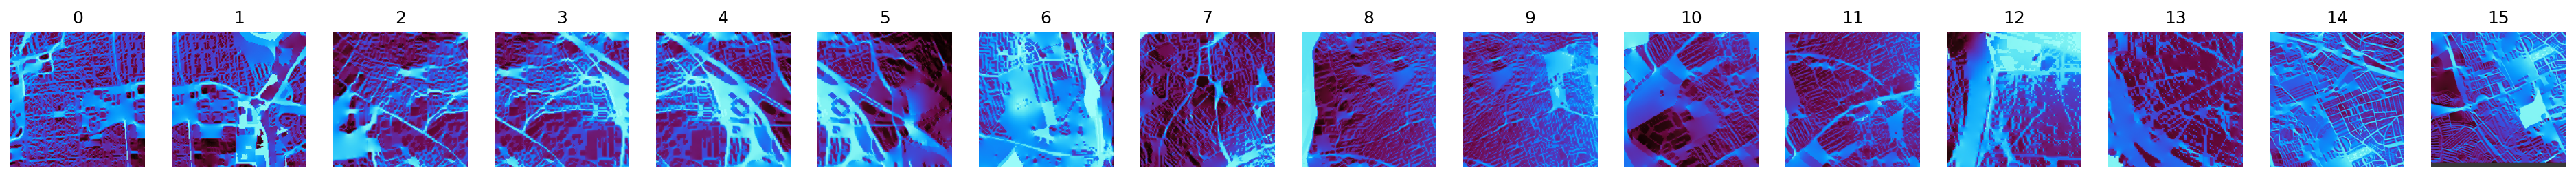

In [8]:
num_of_data = len(images)

# Set Figure Properties
plt.figure(figsize = (32, 2), dpi=150)

# Plot all figures
for i in range(num_of_data):  
    plt.subplot(1, num_of_data, i+1)
    plt.title(i)
    plt.axis('off')  
    plt.imshow(images[i])

# Define Extraction Method 

In [20]:
def extract_colour(img, img_idx):   
    # Convert the image to the HSV color space
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Define the range of brown color

    # Hue
    upper_h = 30 #@param{type:'slider', min:0, max:255, step:1}
    lower_h = 10 #@param{type:'slider', min:0, max:255, step:1}
    # Saturation
    upper_s = 255 #@param{type:'slider', min:0, max:255, step:1}
    lower_s = 100 #@param{type:'slider', min:0, max:255, step:1}
    # Brightness
    upper_v = 255 #@param{type:'slider', min:0, max:255, step:1}
    lower_v = 20 #@param{type:'slider', min:0, max:255, step:1}

    upper_brown = np.array([upper_h, upper_s, upper_v])
    lower_brown = np.array([lower_h, lower_s, lower_v])


    # Threshold the image to get only brown color
    mask = cv.inRange(hsv, lower_brown, upper_brown)

    # Convert the image to black and white
    bw = cv.bitwise_not(mask)

    # Set the background color to white
    #bw[bw == 0] = 0

    # Automatically save the image
    cv.imwrite(str(img_idx)+'.png', bw)

    # Plot the image
    plt.axis('off')
    plt.imshow(bw, cmap='gray')
    plt.show()

# Run Exaction

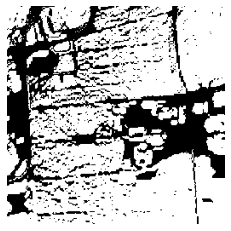

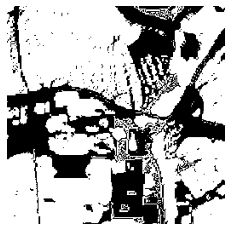

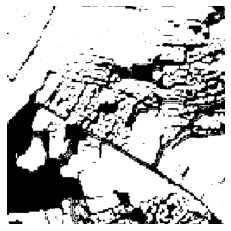

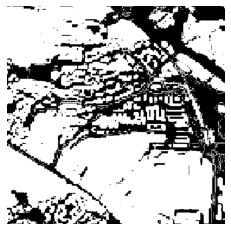

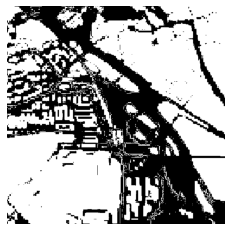

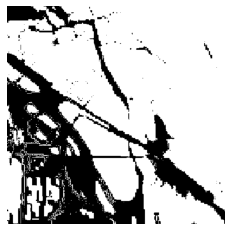

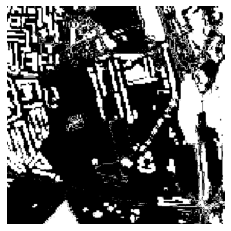

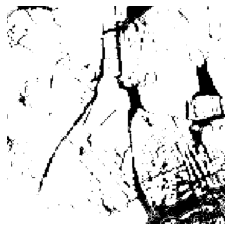

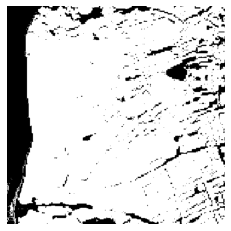

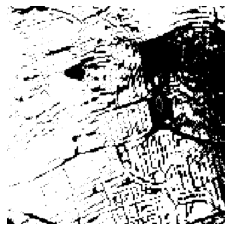

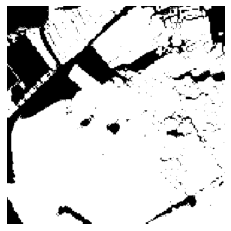

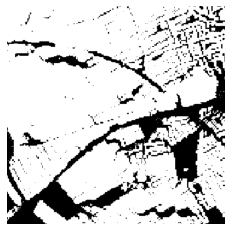

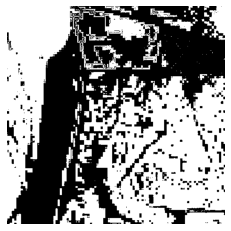

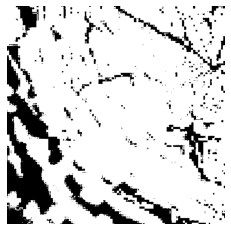

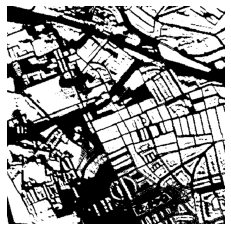

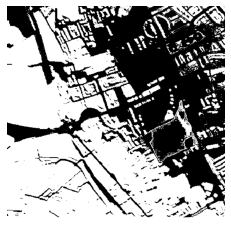

In [21]:
for i in range(num_of_data):    
    extract_colour(images[i], i)      